In [7]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
from PIL import Image

%matplotlib inline

### Now we show some example images

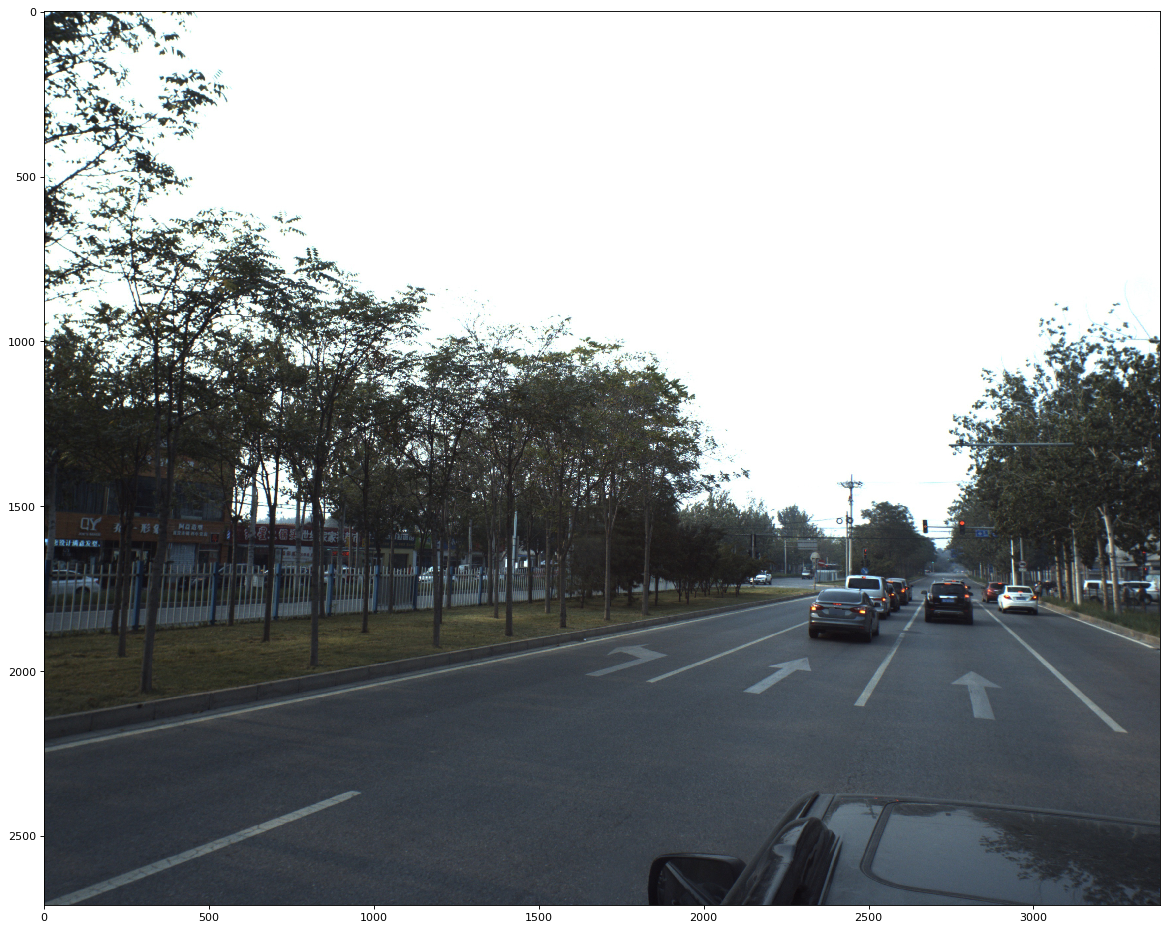

In [10]:
data_dir = '/media/samsumg_1tb/ApolloScape'
image_name = 'road01_ins/ColorImage/Record085/Camera 5/170908_081815404_Camera_5.jpg'
label_name = 'road01_ins/Label/Record085/Camera 5/170908_081815404_Camera_5_instanceIds.png'
im = Image.open(os.path.join(data_dir, image_name))

fig=plt.figure(figsize=(18, 16), dpi= 80)
plt.imshow(im)

### Now we show some label information


array([  255, 33000, 33001, 33002, 33003, 33004, 33005, 33006, 33007,
       33008, 33009, 33010, 33011, 33012, 33013, 33014, 33015, 33016,
       33017, 33018, 36000, 36001, 36002, 36003, 39000, 65535],
      dtype=int32)

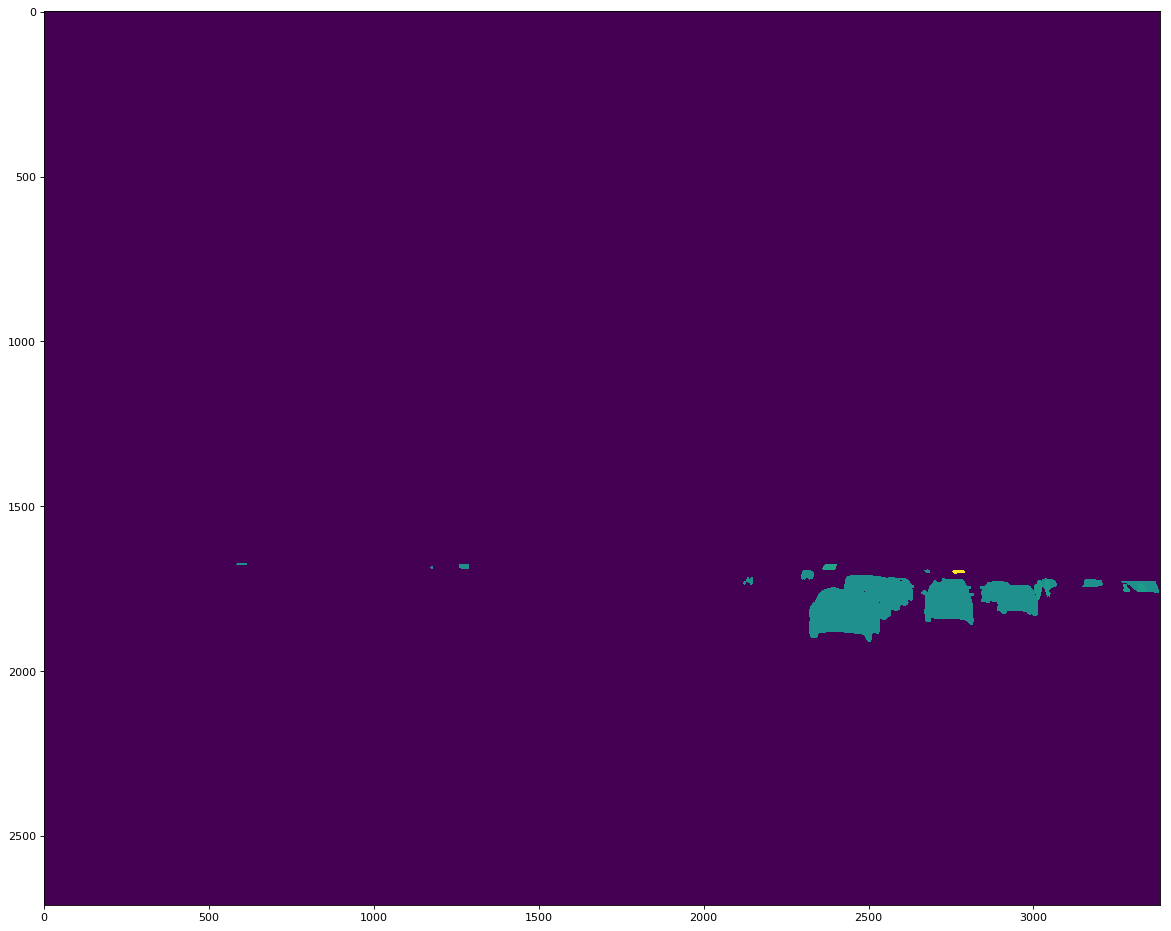

In [13]:
label = Image.open(os.path.join(data_dir, label_name))
label = np.array(label)
fig=plt.figure(figsize=(18, 16), dpi= 80)
plt.imshow(label)
np.unique(label)

### Now we examine whether the json file is identical to the _instanceIds.png file, and yes, the foundings is that they are identical

In [18]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
from PIL import Image
import json
from pprint import pprint
import PIL.ImageDraw as ImageDraw

from pycocotools.coco import COCO
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
%matplotlib inline

In [19]:
data_dir = '/media/samsumg_1tb/ApolloScape'
image_name = 'road01_ins/ColorImage/Record085/Camera 5/170908_081815404_Camera_5.jpg'
label_name = 'road01_ins/Label/Record085/Camera 5/170908_081815404_Camera_5_instanceIds.png'
json_name = 'road01_ins/Label/Record085/Camera 5/170908_081815404_Camera_5.json'

image = Image.open(os.path.join(data_dir, image_name))
label = Image.open(os.path.join(data_dir, label_name))
label = np.array(label)

with open(os.path.join(data_dir, json_name)) as f:
    json_data = json.load(f)

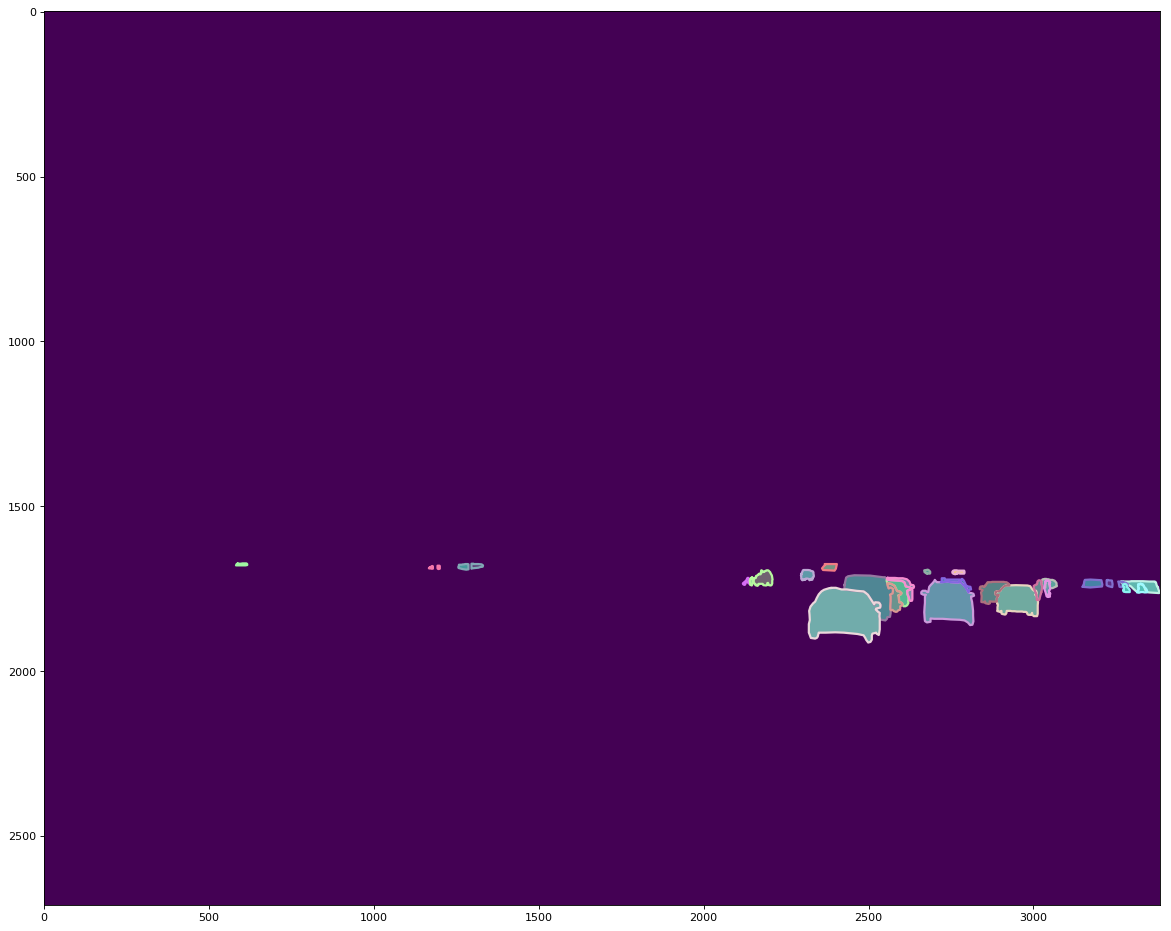

In [20]:
polygons = []
color = []
for ann in json_data['objects']:
    c = (np.random.random((1, 3)) * 0.6 + 0.4).tolist()[0]
    if 'polygons' in ann:
        if type(ann['polygons']) == list:
            # polygon
            for seg in ann['polygons']:
                poly = np.array(seg)
                polygons.append(Polygon(poly))
                color.append(c)
fig=plt.figure(figsize=(18, 16), dpi= 80)

plt.imshow(label)
ax = plt.gca()
ax.set_autoscale_on(True)
p = PatchCollection(polygons, facecolor=color, linewidths=0, alpha=0.4)
ax.add_collection(p)
p = PatchCollection(polygons, facecolor='none', edgecolors=color, linewidths=2)
ax.add_collection(p)

### Now we exam the time continuity

In [21]:
imglist_top_dir = '/media/samsumg_1tb/ApolloScape/ImageLists'
# currently, the training, valid, testing only include road01,02,03 (not 04, maybe we could use 04 for training as well?)
for road_idx in [1,2,3]:
    
